<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Features_Determination_teste_007_dez_05_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 8.5MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4264006 sha256=f941e22f88d4dde61c1e7032a4b227b36d8ea20cc3e00dd85403a924b9f57697
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:

!git clone https://github.com/ucfilho/marquesgabi #clonar do Github
%cd marquesgabi

Cloning into 'marquesgabi'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 321 (delta 92), reused 0 (delta 0), pack-reused 162
Receiving objects: 100% (321/321), 7.25 MiB | 10.15 MiB/s, done.
Resolving deltas: 100% (178/178), done.
/content/marquesgabi


In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
import re
import Go2BlackWhite
import Go2Mahotas
%matplotlib inline

In [0]:
Size=200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
!wget http://ftp.feq.ufu.br/ubirajara/GrBuInd.zip
Transfere='GrBuInd.zip'

--2019-12-04 02:25:55--  http://ftp.feq.ufu.br/ubirajara/GrBuInd.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 497627 (486K) [application/zip]
Saving to: ‘GrBuInd.zip’

GrBuInd.zip         100%[===================>] 485.96K   298KB/s    in 1.6s    

2019-12-04 02:25:58 (298 KB/s) - ‘GrBuInd.zip’ saved [497627/497627]



In [0]:
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
# print(img_name)

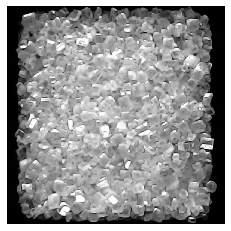

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) # ww contain all photos in black and white
plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
# Find the list elements starting with specific letter
subs = 'B'
Buraco = [x for x in img_name if re.search(subs, x)] 
subs = 'G'
Grao = [x for x in img_name if re.search(subs, x)] 
subs = 'I'
Indef = [x for x in img_name if re.search(subs, x)] 

In [0]:
df=Go2Mahotas.Mahotas(ww[0],Size,Sub_Size,Crop,img_name) # find df texture for a given picture
print(df)

          ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0    0.016737  112.116630  0.989793  ...     4.002139 -0.433453  0.998729
1    0.015302  112.690671  0.989666  ...     4.016238 -0.431662  0.998731
2    0.013945  113.202544  0.989538  ...     4.028704 -0.430047  0.998735
3    0.012667  113.794892  0.989396  ...     4.041808 -0.428298  0.998737
4    0.011468  114.375563  0.989251  ...     4.054223 -0.426623  0.998738
..        ...         ...       ...  ...          ...       ...       ...
636  0.024355  197.242628  0.978905  ...     4.138715 -0.407760  0.997588
637  0.026191  196.800066  0.979100  ...     4.123694 -0.409525  0.997585
638  0.028107  196.232976  0.979293  ...     4.107515 -0.411328  0.997579
639  0.030101  195.748772  0.979463  ...     4.092386 -0.412937  0.997567
640  0.032174  195.154793  0.979636  ...     4.076268 -0.414630  0.997555

[641 rows x 13 columns]


In [0]:
j=0
cont=-1
Posicao_Buraco=[]
for i in img_name:
  cont=cont+1
  for k in Buraco:
    if(i==k):
      Posicao_Buraco.append(cont)
j=0
cont=-1
Posicao_Grao=[]
for i in img_name:
  cont=cont+1
  for k in Grao:
    if(i==k):
      Posicao_Grao.append(cont)

j=0
cont=-1
Posicao_Indef=[]
for i in img_name:
  cont=cont+1
  for k in Indef:
    if(i==k):
      Posicao_Indef.append(cont)

# print(Posicao_Grao)
# print(Posicao_Buraco)
# print(Posicao_Indef)


[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]


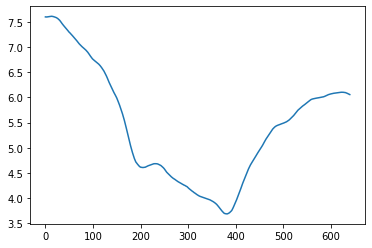

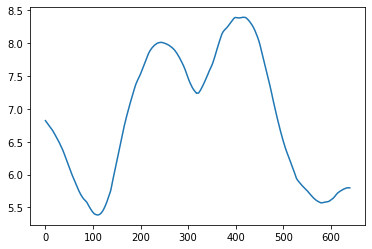

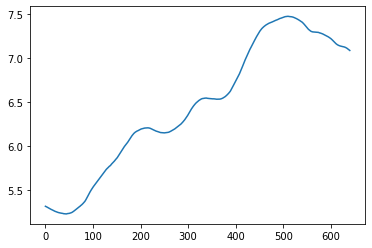

In [0]:
'''
# compara entropia dos tres primeiros buracos
for i in range(3):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['entropy'])
'''


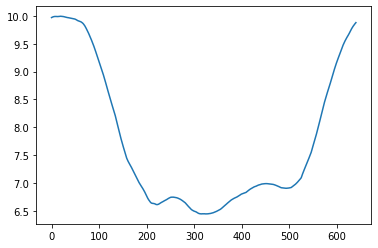

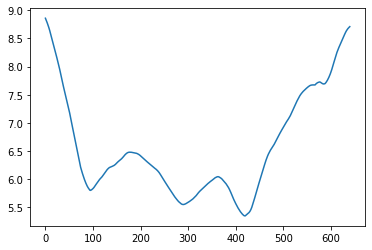

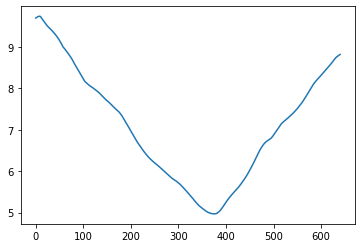

In [0]:
'''
# compara entropia dos tres primeiros graos
for i in range(3):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['entropy'])
'''

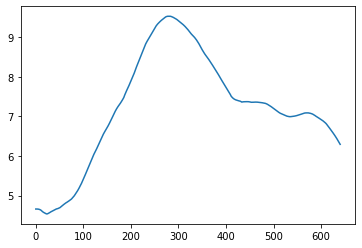

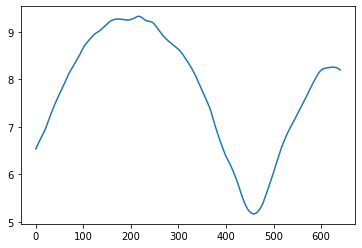

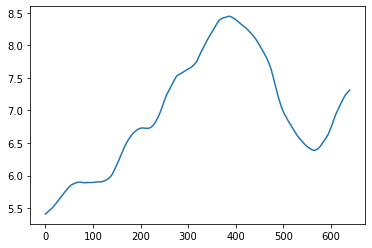

In [0]:
'''
# compara entropia dos tres primeiros Indef
for i in range(3):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['entropy'])
'''

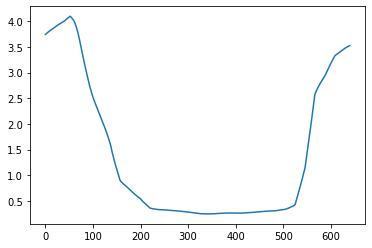

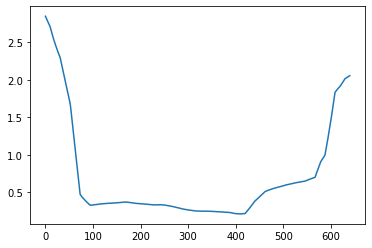

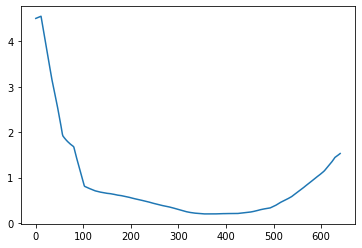

In [0]:
# compara constrast dos tres primeiros graos
Num=len(Posicao_Grao)
for i in range(Num):
  k=Posicao_Grao[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['constrast'])

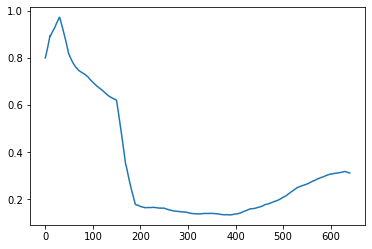

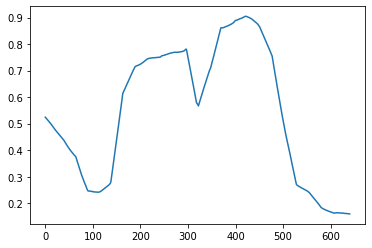

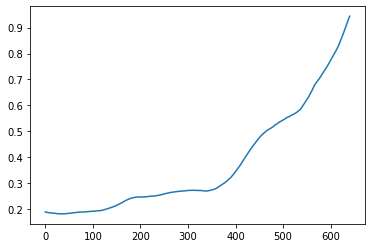

In [0]:
# compara constrast dos tres primeiros buracos
for i in range(3):
  k=Posicao_Buraco[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['constrast'])

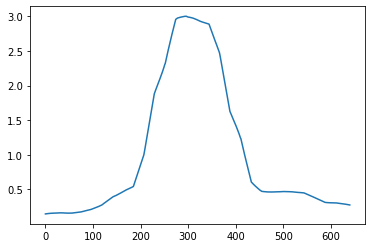

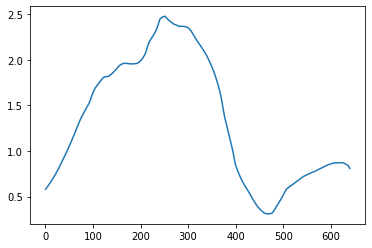

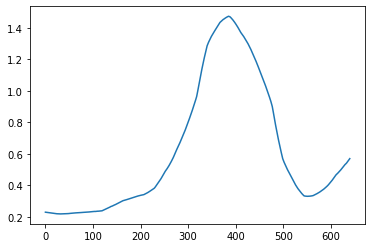

In [0]:
# compara constrast dos tres primeiros Indef
for i in range(3):
  k=Posicao_Indef[i]
  df=Go2Mahotas.Mahotas(ww[k],Size,Sub_Size,Crop,img_name) 
  plt.figure(i+1)
  plt.plot(df['constrast'])